# Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

# Dataset link :-

https://github.com/dsrscientist/dataset3/blob/main/bank_marketing.csv

# Import The Dataset And Create The DataFrame

In [2]:
df = pd.read_csv(r'E:\Flip Robo\dataset\bank_marketing.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# Basic Data Exploration

In this operation, we will perform below operations to check the dataset.

Head of the datset                                                                           
The shape of the dataset                                                                  
Info of the dataset                                                                            
summary of the dataset

# Head, tail, sample of the dataset

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2575,60,admin.,married,secondary,no,106,no,no,cellular,21,aug,216,3,91,1,success,yes
2247,32,blue-collar,married,secondary,no,889,yes,no,cellular,3,jun,1076,2,85,3,other,yes
8432,41,management,divorced,tertiary,no,647,yes,no,unknown,16,may,270,1,-1,0,unknown,no
6673,45,blue-collar,married,primary,no,789,no,yes,cellular,29,jan,79,1,-1,0,unknown,no
94,43,services,divorced,secondary,no,1040,yes,no,unknown,19,may,552,3,-1,0,unknown,yes


# Shape of the dataset

In [7]:
df.shape

(11162, 17)

In [8]:
print("Number of Rows :",df.shape[0])
print("Number of Columns :",df.shape[1])

Number of Rows : 11162
Number of Columns : 17


The Shape attribute tell us how many rows and columns are present into the dataset. It is used to check the dimension of data.

In this dataset we have 11162 rows and 17 columns.

# Information of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# Summary of the dataset

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


The described method will help to see how data has been spread for numerical values.

The counts of the columns are same which means there are no missing values in the dataset.

# Handling missing value

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

We can see In this dataset no null value are present.

Now, lets visualize it using heatmap.

<AxesSubplot:>

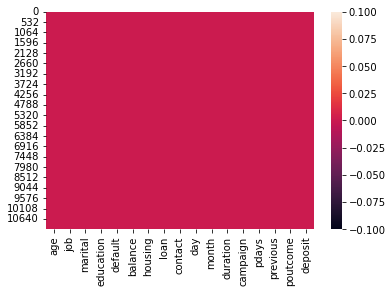

In [12]:
sns.heatmap(df.isnull())

Now, we can clearly visualize no missing value are present in this dataset.

# Data Visualization

# Univerate Analysis

In this dataset Deposit is our target variable.

no     5873
yes    5289
Name: deposit, dtype: int64


<AxesSubplot:xlabel='deposit', ylabel='count'>

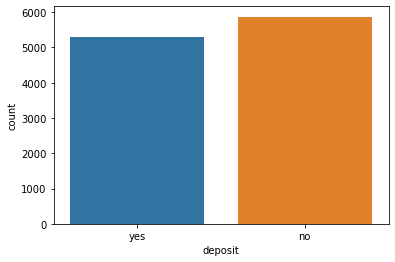

In [15]:
print(df['deposit'].value_counts())
sns.countplot(df['deposit'])

here, we can see maximum people doestn't deposit as compair to deposit people

<AxesSubplot:xlabel='month', ylabel='count'>

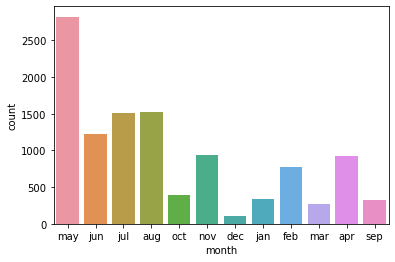

In [17]:
sns.countplot(df['month'])

Here, we can see in may month maximum people contect as compair to another month.

<AxesSubplot:xlabel='day', ylabel='count'>

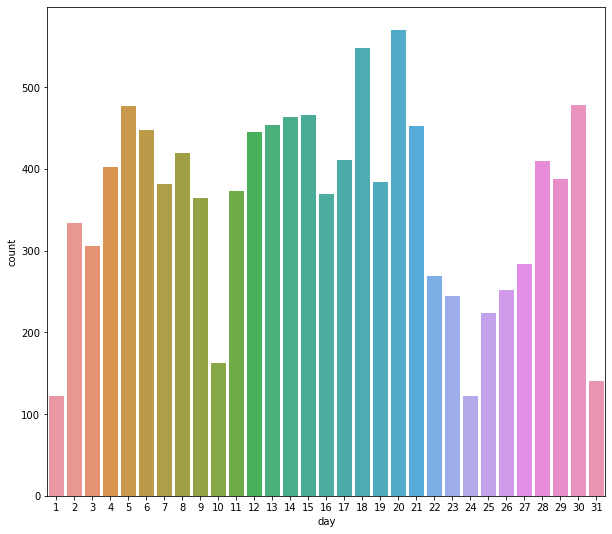

In [20]:
plt.figure(figsize=(10,9))
sns.countplot(df['day'])

here, we can clearly visualize in which every weak which day contact is done.

<AxesSubplot:xlabel='contact', ylabel='count'>

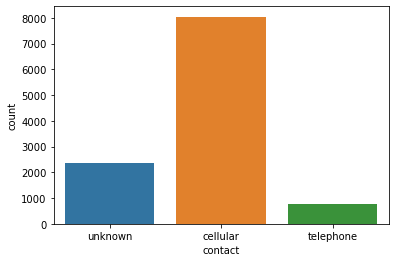

In [21]:
sns.countplot(df['contact'])

here, we can see maximum people use for cellular contact to communication.

<AxesSubplot:xlabel='loan', ylabel='count'>

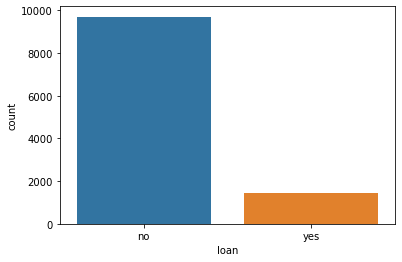

In [22]:
sns.countplot(df['loan'])

here, we can see only few people get personal loan and maximum people doesn't get personal loan.

<AxesSubplot:xlabel='housing', ylabel='count'>

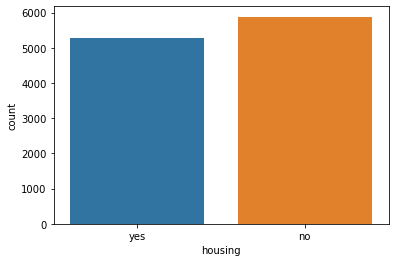

In [24]:
sns.countplot(df['housing'])

here, we can see maximum people doesn't get home loan but average people around 5200 people get home loan.

<AxesSubplot:xlabel='default', ylabel='count'>

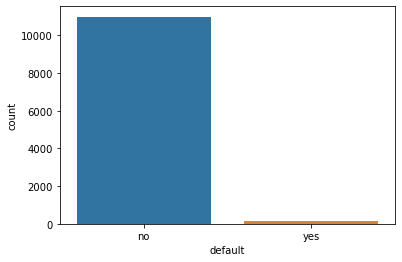

In [26]:
sns.countplot(df['default'])

here, we can see maximum peoples their credit are not default.

<AxesSubplot:xlabel='education', ylabel='count'>

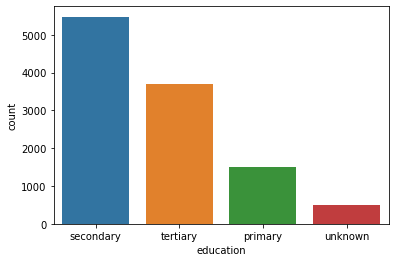

In [27]:
sns.countplot(df['education'])

here, we can see maximum people completed their secondary education as compair to another.

<AxesSubplot:xlabel='marital', ylabel='count'>

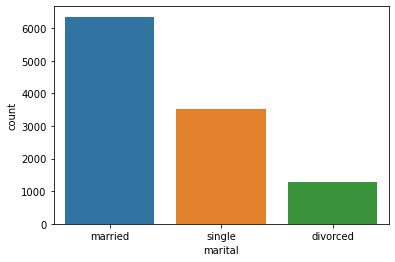

In [28]:
sns.countplot(df['marital'])

here, we can see maximum people are married and average people are single and some people are divorced.

<AxesSubplot:xlabel='job', ylabel='count'>

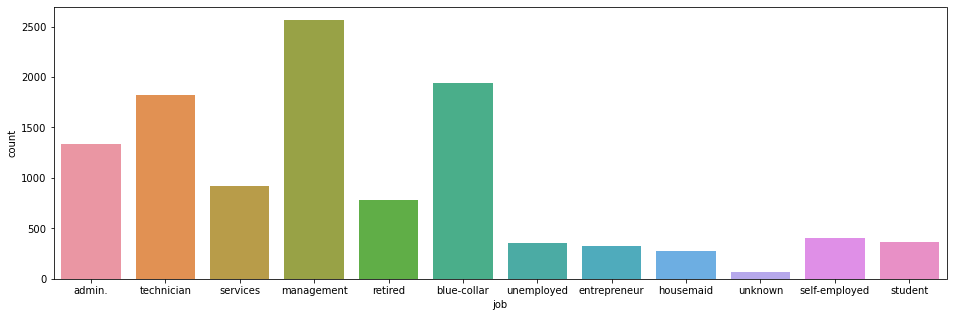

In [34]:
plt.figure(figsize=(16,5))
sns.countplot(df['job'])

here, we can clearly visualize maximum people work on management.

<AxesSubplot:xlabel='age', ylabel='Density'>

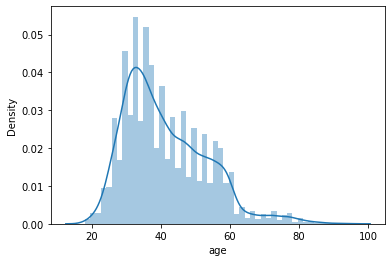

In [37]:
sns.distplot(df['age'])

here, we can clearly visualize the age between 25 to 40 maximum people open account.

# Encoding

In [48]:
df.replace({'marital':{'married':1,'single':0,'divorced':2},'education':{'primary':0,'secondary':1,'tertiary':2,'unknown':3},'default':{'no':0,'yes':1},'housing':{'no':0,'yes':1},'loan':{'no':0,'yes':1},'contact':{'unknown':0,'cellular':1,'telephone':2},'month':{'jan':0,'feb':1,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},'poutcome':{'unknown':0,'failure':1,'success':2,'other':3},'deposit':{'no':0,'yes':1}},inplace=True)

In [49]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,1,0,2343,1,0,0,5,5,1042,1,-1,0,0,1
1,56,admin.,1,1,0,45,0,0,0,5,5,1467,1,-1,0,0,1
2,41,technician,1,1,0,1270,1,0,0,5,5,1389,1,-1,0,0,1
3,55,services,1,1,0,2476,1,0,0,5,5,579,1,-1,0,0,1
4,54,admin.,1,2,0,184,0,0,0,5,5,673,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,0,0,0,1,1,0,1,20,4,257,1,-1,0,0,0
11158,39,services,1,1,0,733,0,0,0,16,6,83,4,-1,0,0,0
11159,32,technician,0,1,0,29,0,0,1,19,8,156,2,-1,0,0,0
11160,43,technician,1,1,0,0,0,1,1,8,5,9,2,172,5,1,0


In [50]:
X = df.drop(columns=['job','deposit'],axis=1)
y = df['deposit']

Splitting the dataset into the training set and test set.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [53]:
X_train.shape, X_test.shape

((8929, 15), (2233, 15))

# Standard Scaler

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
st = StandardScaler()

In [56]:
X_train_res = st.fit_transform(X_train)
X_test_res = st.fit_transform(X_test)

# Applying PCA

To reduce the dimensionality of large dataset by transforming a large set of variables into a smaller one.

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=0.90)

In [59]:
X_train_res = pca.fit_transform(X_train_res)
X_test_res = pca.transform(X_test_res)

In [60]:
pca.explained_variance_ratio_

array([0.15682156, 0.10604231, 0.09284289, 0.07836727, 0.06935295,
       0.0673453 , 0.06244182, 0.06085086, 0.05916144, 0.05757439,
       0.05707119, 0.04729773])

In [61]:
sum(pca.explained_variance_ratio_)

0.9151696801910392

# Logistic Regression

When we are analysis my dataset then i was find in my dataset classification problem is going on.

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
Lr = LogisticRegression()

In [64]:
Lr.fit(X_train_res,y_train)

LogisticRegression()

In [65]:
y_pred1 = Lr.predict(X_test_res)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_test,y_pred1)

0.7836990595611285

here, we can see LogisticRegression is 78% accurate in this dataset.

Now i am checking precision score, recall score and f1 score

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [69]:
print("Precision Score is :",precision_score(y_test,y_pred1))
print("recall Score is :",recall_score(y_test,y_pred1))
print("f1 Score is :",f1_score(y_test,y_pred1))

Precision Score is : 0.775530839231547
recall Score is : 0.7461089494163424
f1 Score is : 0.7605354486861676


# KNeighbors Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier()

In [73]:
knn.fit(X_train_res,y_train)

KNeighborsClassifier()

In [74]:
y_pred2 = knn.predict(X_test_res)

In [75]:
accuracy_score(y_test,y_pred2)

0.8034034930586654

here, we can see KNN is 82% accurate in this dataset.

In [76]:
print("Precision Score is :",precision_score(y_test,y_pred2))
print("Recall Score is :",recall_score(y_test,y_pred2))
print("F1 Score is :",f1_score(y_test,y_pred2))

Precision Score is : 0.790720631786772
Recall Score is : 0.7791828793774319
F1 Score is : 0.7849093581577659


# Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt = DecisionTreeClassifier()

In [79]:
dt.fit(X_train_res,y_train)

DecisionTreeClassifier()

In [80]:
y_pred3 = dt.predict(X_test_res)

In [81]:
accuracy_score(y_test,y_pred3)

0.7442901925660547

Here, we can see Decision Tree is 74% accurate in this dataset.

In [82]:
print("Precision Score is :",precision_score(y_test,y_pred3))
print("Recall Score is :",recall_score(y_test,y_pred3))
print("F1 Score is :",f1_score(y_test,y_pred3))

Precision Score is : 0.7269116186693148
Recall Score is : 0.7120622568093385
F1 Score is : 0.7194103194103193


# Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier()

In [85]:
rf.fit(X_train_res,y_train)

RandomForestClassifier()

In [86]:
y_pred4 = rf.predict(X_test_res)

In [87]:
accuracy_score(y_test,y_pred4)

0.825347066726377

here, we can see Random Forest is 82% accurate in this dataset.

In [88]:
print("Precision Score is :",precision_score(y_test,y_pred4))
print("Recall Score is :",recall_score(y_test,y_pred4))
print("F1 Score is :",f1_score(y_test,y_pred4))

Precision Score is : 0.7953703703703704
Recall Score is : 0.835603112840467
F1 Score is : 0.8149905123339658


# SVM

In [89]:
from sklearn import svm

In [90]:
svm = svm.SVC()

In [91]:
svm.fit(X_train_res,y_train)

SVC()

In [92]:
y_pred5 = svm.predict(X_test_res)

In [93]:
accuracy_score(y_test,y_pred5)

0.8101209135691895

here, we can see SVM is 81% accurate in this dataset.

In [94]:
print("Precision Score is :",precision_score(y_test,y_pred5))
print("Recall Score is :",recall_score(y_test,y_pred5))
print("F1 Score is :",f1_score(y_test,y_pred5))

Precision Score is : 0.7715827338129496
Recall Score is : 0.8346303501945526
F1 Score is : 0.8018691588785046


In [95]:
final_data = pd.DataFrame({'Models':['LR','KNN','DT','RF','SVM'],
             'ACC':[accuracy_score(y_test,y_pred1)*100,
                   accuracy_score(y_test,y_pred2)*100,
                   accuracy_score(y_test,y_pred3)*100,
                   accuracy_score(y_test,y_pred4)*100,
                   accuracy_score(y_test,y_pred5)*100]})

In [96]:
final_data

,Models,ACC
0,LR,78.369906
1,KNN,80.340349
2,DT,74.429019
3,RF,82.534707
4,SVM,81.012091


<AxesSubplot:xlabel='Models', ylabel='ACC'>

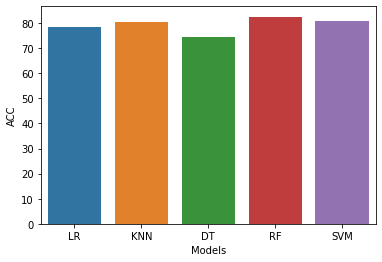

In [97]:
sns.barplot(final_data['Models'],final_data['ACC'])

here, we can see RF is best perform in this dataset

# Save the Model

In [106]:
X = df.drop(columns=['job','deposit'],axis=1)
y = df['deposit']

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
X_res,y = SMOTE().fit_resample(X,y)

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
st = StandardScaler()

In [111]:
X = st.fit_transform(X_res)

In [112]:
X = pca.fit_transform(X)

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier()

In [115]:
rf.fit(X,y)

RandomForestClassifier()

In [116]:
import joblib

In [117]:
joblib.dump(rf,'Bank Marketing')

['Bank Marketing']

In [119]:
model = joblib.load("Bank Marketing")

In [121]:
new_data = pd.DataFrame({
    'age':25,
    'marital':0,
    'education':2,
    'default':0,
    'balance':5200,
    'housing':0,
    'loan':0,
    'contact':0,
    'day':4,
    'month':4,
    'duration':1021,
    'campaign':1,
    'pdays':-1,
    'previous':0,
    'poutcome':1,
},index=[0])

In [122]:
new_data

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,25,0,2,0,5200,0,0,0,4,4,1021,1,-1,0,1


In [123]:
test = pca.transform(st.transform(new_data))

In [124]:
test

array([[-0.13616458, -1.90464418,  1.20317585, -2.09612023, -0.05231978,
         0.9476672 ,  1.04331388, -0.08883075,  0.75687412, -0.24854072,
         0.73760598,  1.74026253]])

In [125]:
result = model.predict(test)

In [126]:
result

array([1], dtype=int64)

In [128]:
if result[0] == 1:
    print('Yes deposit')
else:
    print("No deposit")

Yes deposit
